In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from numpy import where as IF
import seaborn as sns

In [2]:
customer = pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Ecommerce/CUSTOMERS.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [3]:
geo = pd.read_csv(r'C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Ecommerce/GEO_LOCATION.csv')
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [4]:
order_item = pd.read_csv(r'C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Ecommerce/ORDER_ITEMS.csv')
order_item.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87


In [5]:
payment = pd.read_csv(r'C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Ecommerce/ORDER_PAYMENTS.csv')
payment.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [6]:
order_review = pd.read_csv(r'C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Ecommerce/ORDER_REVIEW_RATINGS.csv')
order_review.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36


In [7]:
order_review.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [8]:
order_review['review_creation_date'] = pd.to_datetime(order_review['review_creation_date'])
order_review['review_answer_timestamp'] = pd.to_datetime(order_review['review_answer_timestamp'])
order_review.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00


In [9]:
order_review.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [10]:
orders = pd.read_csv(r'C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Ecommerce/ORDERS.csv')
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,3/8/2018 20:57,3/9/2018 11:20,3/9/2018 22:11,3/16/2018 13:08,4/3/2018 0:00


In [11]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [13]:
#converting date datatypes
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders["order_approved_at"] = pd.to_datetime(orders['order_approved_at'])
orders["order_delivered_carrier_date"] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders["order_delivered_customer_date"] = pd.to_datetime(orders['order_delivered_customer_date'])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [14]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [15]:
product = pd.read_csv(r'C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Ecommerce/PRODUCTS.csv')
product.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [16]:
seller = pd.read_csv(r'C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Ecommerce/SELLERS.csv')
seller.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh


In [17]:
cust_order = pd.merge(left = customer,right=orders,on =['customer_id','customer_id'],how='left')
m = pd.merge(cust_order,payment, how= 'left', left_on = 'order_id', right_on= 'order_id')
cust_order_pay = pd.merge(m,order_item,how='left',left_on = 'order_id', right_on= 'order_id')
cust_order_pay.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79


## EDA

### Solution 1(a)

### Total Revenue

In [18]:
order_item_payment = pd.merge(left=order_item,right=payment,on=["order_id","order_id"],how="left")
order_item_payment.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87,1.0,credit_card,5.0,216.87


In [18]:
order_item_payment["Revenue"] = order_item_payment['order_item_id']*order_item_payment['payment_value']
order_item_payment.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,1.0,credit_card,2.0,72.19,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93,1.0,credit_card,3.0,259.83,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87,1.0,credit_card,5.0,216.87,216.87


In [19]:
total_revenue = order_item_payment["Revenue"].sum()
print('Total revenue is-->',total_revenue)

Total revenue is--> 30090065.51


### Total quantity

In [20]:
total_quantity = order_item_payment["Revenue"].count()
print('Total revenue is-->',total_quantity)

Total revenue is--> 117601


### Total products

In [21]:
total_product = product['product_category_name'].value_counts().sum()
total_product

32328

In [22]:
print('Total product count is-->',total_product)

Total product count is--> 32328


### Total categories

In [23]:
product['product_category_name'].unique()

array(['Perfumery', 'Art', 'Sports_Leisure', 'Baby', 'Housewares',
       'Musical_Instruments', 'Cool_Stuff', 'Furniture_Decor',
       'Home_Appliances', 'Toys', 'Bed_Bath_Table',
       'Construction_Tools_Safety', 'Computers_Accessories',
       'Health_Beauty', 'Luggage_Accessories', 'Garden_Tools',
       'Office_Furniture', 'Auto', 'Electronics', 'Fashion_Shoes',
       'Telephony', 'Stationery', 'Fashion_Bags_Accessories', 'Computers',
       'Home_Construction', 'Watches_Gifts',
       'Construction_Tools_Construction', 'Pet_Shop', 'Small_Appliances',
       'Agro_Industry_And_Commerce', nan, 'Furniture_Living_Room',
       'Signaling_And_Security', 'Air_Conditioning', 'Consoles_Games',
       'Books_General_Interest', 'Costruction_Tools_Tools',
       'Fashion_Underwear_Beach', 'Fashion_Male_Clothing',
       'Kitchen_Dining_Laundry_Garden_Furniture',
       'Industry_Commerce_And_Business', 'Fixed_Telephony',
       'Construction_Tools_Lights', 'Books_Technical',
       'Hom

In [24]:
total_categorie = product['product_category_name'].value_counts().count()
total_categorie

71

### Total sellers

In [25]:
seller.seller_state.unique()

array(['Andhra Pradesh', 'Gujarat', 'Chhattisgarh', 'Kerala', 'Karnataka',
       'Jammu & Kashmir', 'Haryana', 'Maharashtra', 'Orissa',
       'Tamil Nadu', 'Arunachal Pradesh', 'Delhi', 'West Bengal',
       'Madhya Pradesh', 'Rajasthan', 'Himachal Pradesh', 'Punjab',
       'Uttar Pradesh', nan, 'Uttaranchal'], dtype=object)

In [26]:
total_seller = seller.seller_state.value_counts().count()
print("Total_seller count is-->",total_seller)

Total_seller count is--> 19


### Total locations

In [27]:
geo.geolocation_state.unique()

array(['Andhra Pradesh', 'Delhi', 'Madhya Pradesh', 'Chhattisgarh',
       'Gujarat', 'Haryana', 'Jammu & Kashmir', 'Karnataka', 'Rajasthan',
       'Kerala', 'Himachal Pradesh', 'Tamil Nadu', 'Punjab',
       'Maharashtra', 'Goa', 'West Bengal', 'Uttar Pradesh',
       'Arunachal Pradesh', 'Orissa', 'Uttaranchal'], dtype=object)

In [28]:
total_location = geo.geolocation_state.value_counts().count()
print("Total location is-->",total_location)

Total location is--> 20


### Total payment methods

In [29]:
payment.payment_type.unique()

array(['credit_card', 'UPI', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [30]:
payment.payment_type.value_counts().count()

5

### 1(b)

In [31]:
user = cust_order_pay.groupby(['customer_unique_id'])['order_purchase_timestamp'].min().reset_index()
user

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:00
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:00
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:00
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:00


In [32]:
user.columns = ['customer_unique_id','reg_date']
user['reg_month'] = user['reg_date'].values.astype('datetime64[M]')
user

,customer_unique_id,reg_date,reg_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00,2017-11-01
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:00,2017-06-01
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:00,2017-12-01
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:00,2017-02-01
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:00,2018-05-01


In [33]:
user.dtypes

customer_unique_id            object
reg_date              datetime64[ns]
reg_month             datetime64[ns]
dtype: object

In [34]:
min_month = cust_order_pay['order_purchase_timestamp'].values.astype('datetime64[M]').min()
max_month = cust_order_pay['order_purchase_timestamp'].values.astype('datetime64[M]').max()
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq = 'MS'))
dr.head()

,0
0,2016-09-01
1,2016-10-01
2,2016-11-01
3,2016-12-01
4,2017-01-01


In [35]:
dr.columns =['month']
dr.head(2)

,month
0,2016-09-01
1,2016-10-01


In [36]:
dr['key'] = 1
user['key'] = 1
report = dr.merge(user,on = 'key')
report.head(3)

,month,key,customer_unique_id,reg_date,reg_month
0,2016-09-01,1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,2018-05-01
1,2016-09-01,1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,2018-05-01
2,2016-09-01,1,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,2017-03-01


In [37]:
report = report[report['month']>=report['reg_month']]
cust_order_pay['months'] = cust_order_pay['order_purchase_timestamp'].values.astype('datetime64[M]')

In [38]:
report['customer'] = 1
report['New_Customer'] = (report['reg_month'] == report['month']) * 1
report = report.groupby('month')[['customer','New_Customer']].agg('sum')
report.head(6)

,customer,New_Customer
month,,
2016-09-01,4,4
2016-10-01,325,321
2016-11-01,325,0
2016-12-01,326,1
2017-01-01,1090,764
2017-02-01,2842,1752


In [39]:
pct_report = report.T/report.T.sum()
pct_report.T

,customer,New_Customer
month,,
2016-09-01,0.500000,0.500000
2016-10-01,0.503096,0.496904
2016-11-01,1.000000,0.000000
2016-12-01,0.996942,0.003058
2017-01-01,0.587918,0.412082
2017-02-01,0.618633,0.381367
2017-03-01,0.675129,0.324871
2017-04-01,0.769004,0.230996
2017-05-01,0.760618,0.239382


### 1(c)

In [40]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

cust_order_pay['order_purchase_month'] = cust_order_pay['order_purchase_timestamp'].apply(get_month)
cust_order_pay.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,months,order_purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,2017-05-01,2017-05-01
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,...,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,2018-01-01,2018-01-01


In [41]:
grouping = cust_order_pay.groupby('customer_unique_id')['order_purchase_month']
cust_order_pay['order_purchase_month'] = grouping.transform('min')

In [42]:
def get_date_int(cust_order_pay,column):
    year = cust_order_pay[column].dt.year
    month = cust_order_pay[column].dt.month
    date = cust_order_pay[column].dt.date
    return year,month,date

order_purchase_year, order_month, _ = get_date_int(cust_order_pay,'order_purchase_month')
order_purchase_year, order_month, _ = get_date_int(cust_order_pay,'order_purchase_month')

year_diff = order_purchase_year - order_purchase_year
month_diff = order_month - order_month

cust_order_pay['order_purchase_index'] = year_diff * 12 + month_diff +1


In [43]:
grouping = cust_order_pay.groupby(['order_purchase_month','order_purchase_index'])

In [44]:
order_purchase_data = grouping['customer_unique_id'].apply(pd.Series.nunique)
order_purchase_data = order_purchase_data.reset_index()
order_purchase_data.head()

,order_purchase_month,order_purchase_index,customer_unique_id
0,2016-09-01,1,4
1,2016-10-01,1,321
2,2016-12-01,1,1
3,2017-01-01,1,764
4,2017-02-01,1,1752


In [45]:
order_purchase_counts = order_purchase_data.pivot_table(index= 'order_purchase_month',columns='order_purchase_index',values= 'customer_unique_id')
retention = order_purchase_counts
retention

order_purchase_index,1
order_purchase_month,
2016-09-01,4
2016-10-01,321
2016-12-01,1
2017-01-01,764
2017-02-01,1752
2017-03-01,2636
2017-04-01,2352
2017-05-01,3596
2017-06-01,3139


### 1(d)

In [46]:
user = cust_order_pay.groupby(['customer_unique_id'])['order_purchase_timestamp'].min().reset_index()

user.columns = ['customer_unique_id','reg_date']

user['reg_month'] = user['reg_date'].values.astype('datetime64[M]')

min_month = cust_order_pay['order_purchase_timestamp'].values.astype('datetime64[M]').min()
max_month = cust_order_pay['order_purchase_timestamp'].values.astype('datetime64[M]').max()
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq = 'MS'))
dr.columns =['month']

dr['key'] = 1
user['key'] = 1
report = dr.merge(user,on = 'key')

report = report[report['month']>=report['reg_month']]

cust_order_pay['month'] = cust_order_pay['order_purchase_timestamp'].values.astype('datetime64[M]')
cust_order_pay['revenue'] = cust_order_pay['payment_value']*cust_order_pay['order_item_id']
sales_month= cust_order_pay.groupby(['customer_unique_id','month'])[['revenue']].agg('sum').reset_index()

report = report.merge(sales_month,how='left',on=['customer_unique_id','month'])


report['customer'] = 1
report['New_Customer'] = (report['reg_month'] == report['month']) * 1
report['active customer'] = (report['revenue'] > 0)*1

report = report.groupby('month')[['revenue','customer','New_Customer','active customer']].agg('sum')
report

,revenue,customer,New_Customer,active customer
month,,,,
2016-09-01,483.75,4,4,2
2016-10-01,107011.61,325,321,305
2016-11-01,0.00,325,0,0
2016-12-01,19.62,326,1,1
2017-01-01,337241.44,1090,764,755
2017-02-01,433023.00,2842,1752,1708
2017-03-01,678804.77,5478,2636,2601
2017-04-01,666781.88,7830,2352,2359
2017-05-01,951068.05,11426,3596,3588


### 1(e) Trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc

### Trends/seasonality of sales

In [47]:
order_payment = pd.merge(left=orders,right=payment,on=["order_id","order_id"],how='left')
order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.0,UPI,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1.0,credit_card,3.0,179.12


In [48]:
# From 'order_purchase_timestamp' column
order_payment['yearly'] = order_payment['order_purchase_timestamp'].dt.year
order_payment['monthly'] = order_payment['order_purchase_timestamp'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))
order_payment.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,yearly,monthly
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,credit_card,1.0,18.12,2017,October
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,3.0,voucher,1.0,2.00,2017,October
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2.0,voucher,1.0,18.59,2017,October


In [49]:
sales_trend = order_payment.groupby(['yearly','monthly'])[['payment_value']].sum().reset_index()
sales_trend

,yearly,monthly,payment_value
0,2016,December,19.62
1,2016,October,59090.48
2,2016,September,252.24
3,2017,April,417788.03
4,2017,August,674396.32
5,2017,December,878401.48
6,2017,February,291908.01
7,2017,January,138488.04
8,2017,July,592382.92
9,2017,June,511276.38


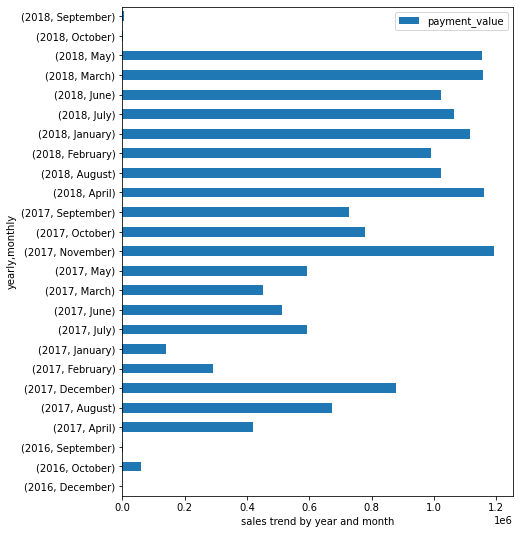

In [53]:
sales_trend = order_payment.groupby(['yearly','monthly'])[['payment_value']].sum()
sales_trend.plot(kind='barh',figsize=(7,9)),plt.xlabel('sales trend by year and month')
plt.show()

### Sales, quantity by category

In [78]:
product_order_item = pd.merge(left=product,right=order_item,on=['product_id','product_id'],how='left')
product_order_item.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,4/30/2018 17:33,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2/6/2018 19:11,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,7/11/2018 21:30,79.80,7.82


In [79]:
merge_data = pd.merge(left=order_payment,right=product_order_item,on=['order_id','order_id'],how='left')
merge_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,credit_card,...,4.0,500.0,19.0,8.0,13.0,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,3.0,voucher,...,4.0,500.0,19.0,8.0,13.0,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2.0,voucher,...,4.0,500.0,19.0,8.0,13.0,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.0,UPI,...,1.0,400.0,19.0,13.0,19.0,1.0,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1.0,credit_card,...,1.0,420.0,24.0,19.0,21.0,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018 8:55,159.90,19.22


In [83]:
sales_category = merge_data.groupby('product_category_name')[['payment_value','order_item_id']].sum().reset_index().rename(columns={'payment_value': 'Total_Sales','order_item_id':'Quantity'})
sales_category

,product_category_name,Total_Sales,Quantity
0,Agro_Industry_And_Commerce,118730.61,316.0
1,Air_Conditioning,91170.66,368.0
2,Art,30992.93,240.0
3,Arts_And_Craftmanship,2326.17,26.0
4,Audio,60324.62,399.0
...,...,...,...
66,Stationery,317440.07,2915.0
67,Tablets_Printing_Image,10042.93,93.0
68,Telephony,486882.05,5349.0
69,Toys,619037.69,4611.0


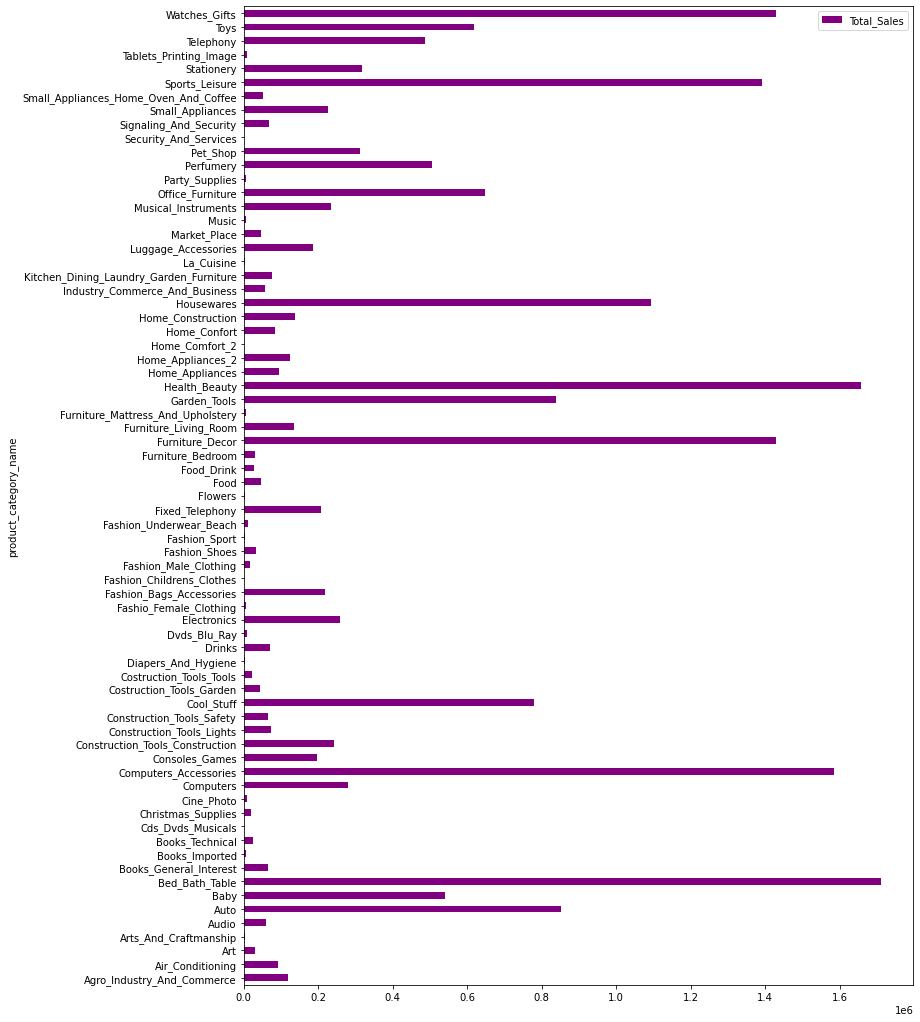

In [84]:
pd.pivot_table(sales_category,index='product_category_name',values='Total_Sales').plot(kind='barh',figsize=(12,18),color='purple')
plt.show()

### Sales & quantity by location

In [89]:
# Geo and customer dataset
geo.rename(columns= {'geolocation_zip_code_prefix':'customer_zip_code_prefix'},inplace =True)
geo.head()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [93]:
customer_geo = pd.merge(left = customer,right=geo,on=['customer_zip_code_prefix','customer_zip_code_prefix'],how='left')
customer_geo.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073,Alwal,Andhra Pradesh


In [101]:
cust_geo_payment = pd.merge(left=customer_geo,right = merge_data,on=['customer_id','customer_id'],how='left')
cust_geo_payment

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,...,1.0,8683.0,54.0,64.0,31.0,1.0,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,...,3.0,10150.0,89.0,15.0,40.0,1.0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,...,1.0,8267.0,52.0,52.0,17.0,1.0,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,...,1.0,12160.0,56.0,51.0,28.0,1.0,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,...,1.0,5200.0,45.0,15.0,35.0,1.0,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,-23.587901,-46.501830,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,...,2.0,611.0,22.0,22.0,23.0,1.0,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,-23.612294,-46.765787,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,...,1.0,1211.0,25.0,24.0,22.0,1.0,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,-3.744128,-38.510859,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,...,1.0,870.0,25.0,20.0,18.0,1.0,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,-29.956391,-51.167614,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,...,1.0,710.0,19.0,13.0,14.0,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07


In [102]:
location_sale = cust_geo_payment.groupby('geolocation_city')[['payment_value','order_item_id']].agg(sum).reset_index().rename(columns={'payment_value':'Total_Sales','order_item_id':'Total_Quantity'})
location_sale.head()

,geolocation_city,Total_Sales,Total_Quantity
0,Aadityana,2244.73,33.0
1,Aambaliyasan,242.94,2.0
2,Aantaliya,16726.52,112.0
3,Abiramam,89.19,1.0
4,Abohar,211.14,4.0


### Sales&Quantity by months

In [113]:
sales_qty_month = cust_geo_payment.groupby(['monthly','yearly'])[['payment_value','order_item_id']].agg(sum).reset_index().rename(columns={'payment_value':'Total_Sales','order_item_id':'Total_Quantity'})
sales_qty_month.head(10)

,monthly,yearly,Total_Sales,Total_Quantity
0,April,2017,510891.55,3270.0
1,April,2018,1497843.94,10031.0
2,August,2017,876129.37,6289.0
3,August,2018,1248837.93,8691.0
4,December,2016,19.62,1.0
5,December,2017,1057582.34,7647.0
6,February,2017,349701.93,2373.0
7,February,2018,1311260.71,9681.0
8,January,2017,189015.66,1369.0
9,January,2018,1415348.54,10163.0


### Sales&quantity by week

In [114]:
cust_geo_payment['weekly'] = cust_geo_payment['order_purchase_timestamp'].dt.isocalendar().week
cust_geo_payment['year'] = cust_geo_payment['order_purchase_timestamp'].dt.year
cust_geo_payment.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,weekly,year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,...,54.0,64.0,31.0,1.0,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,20,2017
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,...,89.0,15.0,40.0,1.0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,2,2018
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,...,52.0,52.0,17.0,1.0,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,20,2018
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,...,56.0,51.0,28.0,1.0,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,11,2018
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,...,45.0,15.0,35.0,1.0,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,30,2018


In [124]:
cust_geo_payment.groupby(['weekly'])[['payment_value','order_item_id']].agg(sum).reset_index()

,weekly,payment_value,order_item_id
0,1,270023.95,1963.0
1,2,388389.06,2607.0
2,3,360990.27,2701.0
3,4,389310.00,2813.0
4,5,433286.32,3057.0
5,6,399092.60,2791.0
6,7,378639.15,2900.0
7,8,427160.30,3261.0
8,9,489233.52,3328.0
9,10,472422.40,3258.0


### Sales&quantity by day

In [125]:
cust_geo_payment['day'] = cust_geo_payment['order_purchase_timestamp'].dt.day_name(locale='english')
cust_geo_payment.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,weekly,year,day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,...,64.0,31.0,1.0,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,20,2017,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,...,15.0,40.0,1.0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,2,2018,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,...,52.0,17.0,1.0,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,20,2018,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,...,51.0,28.0,1.0,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,11,2018,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,...,15.0,35.0,1.0,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,30,2018,Sunday


In [126]:
cust_geo_payment.groupby([cust_geo_payment.order_purchase_timestamp.dt.day])[['payment_value','order_item_id']].sum().reset_index().rename(columns={'order_purchase_timestamp':'Day','payment_value': 'Total_Sales','order_item_id':'Quantity'})

,Day,Total_Sales,Quantity
0,1,689782.50,4318.0
1,2,670149.03,4485.0
2,3,650954.37,4378.0
3,4,684087.50,4592.0
4,5,740125.60,4974.0
5,6,740143.89,4820.0
6,7,700961.44,4672.0
7,8,656822.65,4750.0
8,9,672011.27,4563.0
9,10,651772.38,4373.0


### Sales&quantity by time

In [148]:
cust_geo_payment.groupby(cust_geo_payment.order_purchase_timestamp.dt.time)[['payment_value','order_item_id']].sum().reset_index().rename(columns= {'order_purchase_timestamp':'Time','payment_value': 'Total_Sales','order_item_id':'Quantity'})

,Time,Total_Sales,Quantity
0,00:00:00,8725.39,60.0
1,00:01:00,8460.38,67.0
2,00:02:00,6824.77,54.0
3,00:03:00,10929.12,72.0
4,00:04:00,12188.89,95.0
...,...,...,...
1428,23:55:00,10435.77,80.0
1429,23:56:00,11495.29,88.0
1430,23:57:00,8897.06,57.0
1431,23:58:00,8591.81,54.0


### Sales&Quantity by payment method

In [149]:
payment_sales = cust_geo_payment.groupby('payment_type')[['payment_value','order_item_id']].sum().reset_index()
payment_sales

,payment_type,payment_value,order_item_id
0,UPI,4086820.71,28640.0
1,credit_card,15694885.84,102941.0
2,debit_card,256417.92,1953.0
3,not_defined,0.00,0.0
4,voucher,432602.19,7105.0


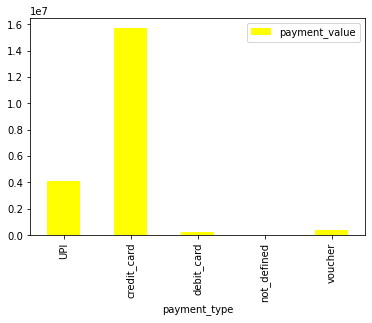

In [179]:
pd.pivot_table(payment_sales,index='payment_type',values='payment_value').plot(kind='bar',color='yellow')
plt.show()

### 1(f)

In [153]:
cust_geo_payment.groupby(['seller_id','monthly','product_category_name','geolocation_state'])[['order_item_id']].count().reset_index().sort_values(by='order_item_id',ascending=False).head().rename(columns={'order_item_id':'Qty'})

,seller_id,monthly,product_category_name,geolocation_state,Qty
6072,1f50f920176fa81dab994f9023523100,November,Garden_Tools,Andhra Pradesh,226
17662,6560211a19b47992c3666cc44a7e94c0,August,Watches_Gifts,Andhra Pradesh,168
17754,6560211a19b47992c3666cc44a7e94c0,July,Watches_Gifts,Andhra Pradesh,156
22640,7d13fca15225358621be4086e1eb0964,May,Watches_Gifts,Andhra Pradesh,147
12875,4a3ca9315b744ce9f8e9374361493884,May,Bed_Bath_Table,Andhra Pradesh,145


### 1(g)

In [155]:
cust_geo_payment.groupby(['monthly','customer_state','product_category_name'])[['order_item_id']].sum().reset_index().sort_values(by='order_item_id',ascending= False).head()

,monthly,customer_state,product_category_name,order_item_id
3032,July,Andhra Pradesh,Health_Beauty,1030.0
652,August,Andhra Pradesh,Bed_Bath_Table,1026.0
1811,February,Andhra Pradesh,Computers_Accessories,999.0
4896,May,Andhra Pradesh,Bed_Bath_Table,995.0
2997,July,Andhra Pradesh,Bed_Bath_Table,994.0


### 1(h)

In [158]:
exp_product = cust_geo_payment.groupby(['product_category_name'])[['payment_value']].sum().reset_index().sort_values(by='payment_value',ascending= False).head(10)
exp_product

,product_category_name,payment_value
7,Bed_Bath_Table,1712553.67
43,Health_Beauty,1657373.12
15,Computers_Accessories,1585330.45
39,Furniture_Decor,1430176.39
70,Watches_Gifts,1429216.68
65,Sports_Leisure,1392127.56
49,Housewares,1094758.13
5,Auto,852294.33
42,Garden_Tools,838280.75
20,Cool_Stuff,779698.00


Text(0.5, 1.0, 'Top 10 most expensive products')

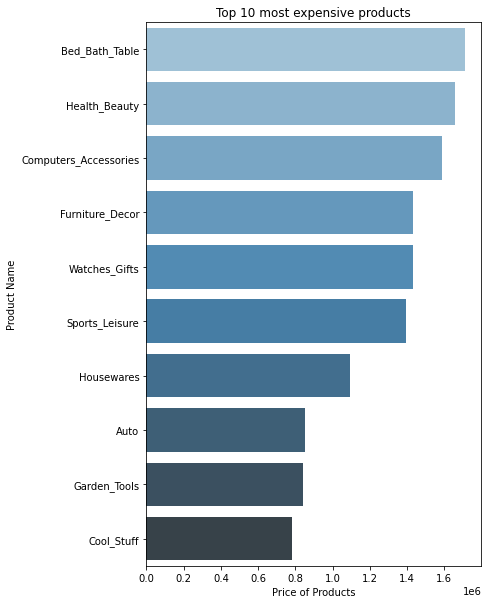

In [161]:
fig = plt.gcf ()
sns.barplot(x='payment_value',y='product_category_name',data=exp_product,palette="Blues_d")
fig.set_size_inches(6, 10)
plt.ylabel('Product Name')
plt.xlabel('Price of Products')
plt.title('Top 10 most expensive products')

## Solution 2(a)

In [162]:
cust_geo_payment["cust_groups"] = IF(cust_geo_payment.payment_value<= 3000, "low",
                        IF(cust_geo_payment.payment_value <= 6000, "medium",
                         IF(cust_geo_payment.payment_value <= 9000, "High","Very High")))
cust_geo_payment.head()                      

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,weekly,year,day,cust_groups
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,...,31.0,1.0,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,20,2017,Tuesday,low
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,...,40.0,1.0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,2,2018,Friday,low
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,...,17.0,1.0,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,20,2018,Saturday,low
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,...,28.0,1.0,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,11,2018,Tuesday,low
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,...,35.0,1.0,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,30,2018,Sunday,low


In [163]:
cust_geo_payment.groupby(['customer_id','cust_groups'])[['payment_value']].sum()

,,payment_value
customer_id,cust_groups,
00012a2ce6f8dcda20d059ce98491703,low,114.74
000161a058600d5901f007fab4c27140,low,67.41
0001fd6190edaaf884bcaf3d49edf079,low,195.42
0002414f95344307404f0ace7a26f1d5,low,179.35
000379cdec625522490c315e70c7a9fb,low,107.01
...,...,...
fffecc9f79fd8c764f843e9951b11341,low,81.36
fffeda5b6d849fbd39689bb92087f431,low,63.13
ffff42319e9b2d713724ae527742af25,low,214.13


### 2(b)

In [164]:
cust_geo_payment["seller_groups"] = IF(cust_geo_payment.payment_value <= 3000, "low",
                                    IF(cust_geo_payment.payment_value <= 10000, "medium",
                                    IF(cust_geo_payment.payment_value <= 100000, "High","Very High")))

cust_geo_payment.head()                      

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,weekly,year,day,cust_groups,seller_groups
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,...,1.0,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,20,2017,Tuesday,low,low
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,...,1.0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,2,2018,Friday,low,low
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,...,1.0,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,20,2018,Saturday,low,low
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,...,1.0,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,11,2018,Tuesday,low,low
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,...,1.0,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,30,2018,Sunday,low,low


In [165]:
cust_geo_payment.groupby(['seller_id','cust_groups'])[['payment_value']].sum()

,,payment_value
seller_id,cust_groups,
0015a82c2db000af6aaaf3ae2ecb0532,low,2748.06
001cca7ae9ae17fb1caed9dfb1094831,low,48349.22
001e6ad469a905060d959994f1b41e4f,low,267.94
002100f778ceb8431b7a1020ff7ab48f,low,2445.64
003554e2dce176b5555353e4f3555ac8,low,139.38
...,...,...
ffcfefa19b08742c5d315f2791395ee5,low,79.52
ffdd9f82b9a447f6f8d4b91554cc7dd3,low,3607.52
ffeee66ac5d5a62fe688b9d26f83f534,low,2259.55


## Solution 3 (Cross-Selling)

In [166]:
top_10 = cust_geo_payment.groupby('seller_id').apply(lambda x:x['product_category_name'].unique()).to_frame().reset_index()
top_10

,seller_id,0
0,0015a82c2db000af6aaaf3ae2ecb0532,[Small_Appliances]
1,001cca7ae9ae17fb1caed9dfb1094831,"[Garden_Tools, Construction_Tools_Construction]"
2,001e6ad469a905060d959994f1b41e4f,[Sports_Leisure]
3,002100f778ceb8431b7a1020ff7ab48f,[Furniture_Decor]
4,003554e2dce176b5555353e4f3555ac8,[nan]
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,[Books_General_Interest]
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,"[Housewares, Furniture_Decor]"
3092,ffeee66ac5d5a62fe688b9d26f83f534,[Home_Appliances]
3093,fffd5413c0700ac820c7069d66d98c89,"[Housewares, Furniture_Decor, Furniture_Living..."


In [169]:
top_10.columns = ['seller_id','products']

In [170]:
top_10['product_count'] = [len(c)for c in top_10['products']]
top_10

,seller_id,products,product_count
0,0015a82c2db000af6aaaf3ae2ecb0532,[Small_Appliances],1
1,001cca7ae9ae17fb1caed9dfb1094831,"[Garden_Tools, Construction_Tools_Construction]",2
2,001e6ad469a905060d959994f1b41e4f,[Sports_Leisure],1
3,002100f778ceb8431b7a1020ff7ab48f,[Furniture_Decor],1
4,003554e2dce176b5555353e4f3555ac8,[nan],1
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,[Books_General_Interest],1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,"[Housewares, Furniture_Decor]",2
3092,ffeee66ac5d5a62fe688b9d26f83f534,[Home_Appliances],1
3093,fffd5413c0700ac820c7069d66d98c89,"[Housewares, Furniture_Decor, Furniture_Living...",3


In [181]:
top_10.sort_values(by = 'product_count',ascending= False,inplace=True)
top_10.head(7)

,seller_id,products,product_count
2146,b2ba3715d723d245138f291a6fe42594,"[Stationery, Electronics, Fixed_Telephony, Hea...",27
947,4e922959ae960d389249c378d1c939f5,"[Sports_Leisure, Signaling_And_Security, Cool_...",24
1824,955fee9216a65b617aa5c0531780ce60,"[Cool_Stuff, Computers_Accessories, Stationery...",23
352,1da3aeb70d7989d1e6d9b0e887f97c23,"[Toys, Sports_Leisure, Fashion_Bags_Accessorie...",21
3005,f8db351d8c4c4c22c6835c19a46f01b0,"[Housewares, Sports_Leisure, Computers_Accesso...",20
290,18a349e75d307f4b4cc646a691ed4216,"[Computers_Accessories, Telephony, Fixed_Telep...",17
819,44073f8b7e41514de3b7815dd0237f4f,"[Health_Beauty, Furniture_Living_Room, Furnitu...",15


C:\Users\jmd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


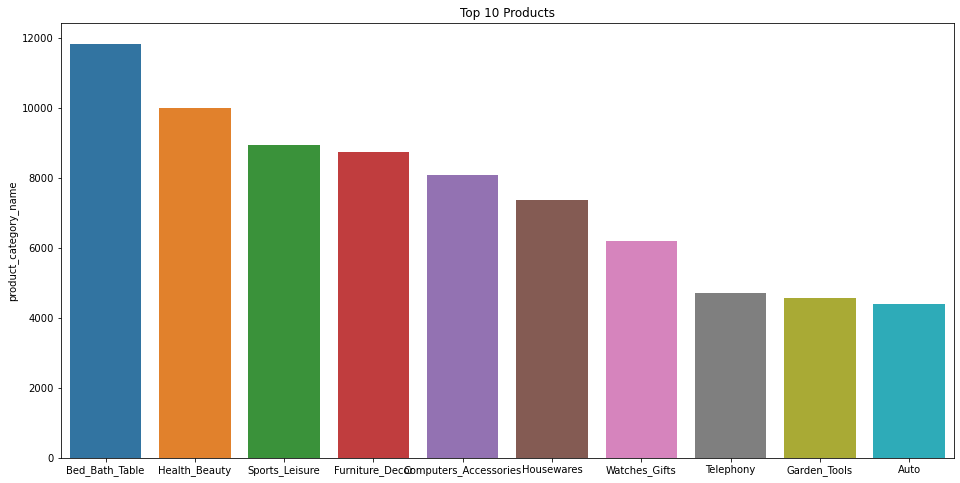

In [193]:
plt.figure(figsize=(16,8))
ax = sns.barplot(cust_geo_payment['product_category_name'].value_counts()[:10].index,cust_geo_payment['product_category_name'].value_counts()[:10])
ax.set_title('Top 10 Products')
plt.show()

## 4(a)

In [191]:
cust_geo_payment.payment_type.unique()

array(['credit_card', 'debit_card', 'voucher', 'UPI', 'not_defined', nan],
      dtype=object)

In [197]:
cust_geo_payment.payment_type.value_counts()

credit_card    87286
UPI            23037
voucher         6407
debit_card      1698
not_defined        3
Name: payment_type, dtype: int64

### 2(b)

In [198]:
used_payment = cust_geo_payment.groupby('payment_type')[['customer_id']].count().sort_values(by='customer_id', ascending= False).head(1).reset_index().rename(columns = {'customer_id':'Count_of_Customers'})
used_payment

,payment_type,Count_of_Customers
0,credit_card,87286


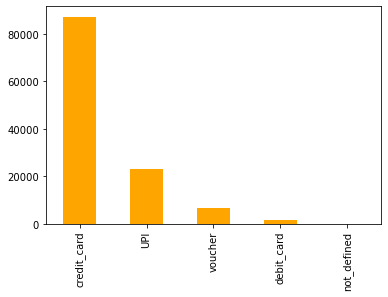

In [200]:
cust_geo_payment.payment_type.value_counts().plot(kind='bar',color='orange')
plt.show()

#### Clearly credit_card is used by most of the customers

## Solution 5

## 5(a)

In [201]:
final_data = pd.merge(left=cust_geo_payment,right=order_review,on=['order_id','order_id'],how='left')
final_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,freight_value,weekly,year,day,cust_groups,seller_groups,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,...,21.88,20,2017,Tuesday,low,low,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,...,46.48,2,2018,Friday,low,low,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30,2018-02-10 22:43:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,...,17.79,20,2018,Saturday,low,low,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,2018-06-15 12:10:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,...,23.36,11,2018,Tuesday,low,low,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29,2018-04-02 18:36:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,...,22.25,30,2018,Sunday,low,low,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10,2018-08-17 01:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,-23.587901,-46.501830,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,...,13.88,14,2018,Saturday,low,low,36e2cdbaa9f639b57c53b37ac798fee8,4,2018-04-14,2018-04-28 11:15:00
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,-23.612294,-46.765787,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,...,14.16,14,2018,Wednesday,low,low,b273b431c3aedb4eed18643309652940,5,2018-04-12,2018-04-16 10:36:00
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,-3.744128,-38.510859,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,...,19.04,14,2018,Sunday,low,low,fa4f16891e6b2edd1354668d07f5648b,1,2018-05-04,2018-05-08 01:41:00
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,-29.956391,-51.167614,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,...,22.07,44,2017,Friday,low,low,0bcdc9e450ea500811a8d39ee993cd47,5,2017-11-17,2017-11-19 23:34:00


### Maximum rated

In [203]:
sol5a=final_data.groupby('product_category_name')[['review_score']].sum()
sol5a.reset_index().sort_values(by = 'review_score', ascending= False).head(10)

,product_category_name,review_score
7,Bed_Bath_Table,46366
43,Health_Beauty,41318
65,Sports_Leisure,36856
39,Furniture_Decor,34407
15,Computers_Accessories,32002
49,Housewares,29854
70,Watches_Gifts,24856
68,Telephony,18612
42,Garden_Tools,18412
5,Auto,17770


## Minimum rated

In [206]:
sol5a2=final_data.groupby('product_category_name')[['review_score']].sum()
sol5a2.reset_index().sort_values(by = 'review_score', ascending= True).head(10)

,product_category_name,review_score
61,Security_And_Services,5
29,Fashion_Childrens_Clothes,36
52,La_Cuisine,63
11,Cds_Dvds_Musicals,65
3,Arts_And_Craftmanship,99
46,Home_Comfort_2,105
23,Diapers_And_Hygiene,127
32,Fashion_Sport,132
35,Flowers,139
41,Furniture_Mattress_And_Upholstery,156


## 5(b)

### Maximum rated

In [209]:
sol5b=final_data.groupby('product_id')[['review_score']].sum().reset_index()
sol5b.sort_values(by = 'review_score', ascending= False).head(10)

,product_id,review_score
22112,aca2eb7d00ea1a7b8ebd4e68314663af,2149
19742,99a4788cb24856965c36a24e339b6058,2047
8613,422879e10f46682990de24d770e7f83d,1993
7364,389d119b48cf3043d311335e499d9c6b,1665
7079,368c6c730842d78016ad823897a372db,1553
10840,53759a2ecddad2bb87a079a1f1519f73,1516
27039,d1c427060a0f73f6b889a5c7c61f2ac4,1456
10867,53b36df67ebb7c41585e8d54d6772e08,1368
2794,154e7e31ebfa092203795c972e5804a6,1274
8051,3dd2a17168ec895c781a9191c1e95ad7,1163


### Minimum rated

In [211]:
sol5b2=final_data.groupby('product_id')[['review_score']].sum().reset_index()
sol5b2.sort_values(by = 'review_score', ascending= True).head(10)

,product_id,review_score
23527,b75683e29689c1a989ae97883e8cad56,1
26221,cb9ebc2581c01de678351c46f55f7f7f,1
2187,10a6596b3224c408ee46c8aaaa2977cd,1
29916,e87c931c62c20f4b62ea85af5e22538a,1
11302,56fd30e18420cb9a5a50c718168fa660,1
17406,871238c57d25f282d163be9e712c36a9,1
11300,56f96b94cbba67352e072d40e4e02167,1
17413,8722afd14143e0192b2abbcee6fe2873,1
17429,873c256958122a0b04f65c23f8bc2329,1
26246,cbd0f39c794fee28d71a874538c18f77,1


## 5(c)

In [214]:
final_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,...,freight_value,weekly,year,day,cust_groups,seller_groups,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,...,21.88,20,2017,Tuesday,low,low,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,...,46.48,2,2018,Friday,low,low,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30,2018-02-10 22:43:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,...,17.79,20,2018,Saturday,low,low,5ad6695d76ee186dc473c42706984d87,5,2018-06-15,2018-06-15 12:10:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,...,23.36,11,2018,Tuesday,low,low,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29,2018-04-02 18:36:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,...,22.25,30,2018,Sunday,low,low,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10,2018-08-17 01:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,-23.587901,-46.501830,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,...,13.88,14,2018,Saturday,low,low,36e2cdbaa9f639b57c53b37ac798fee8,4,2018-04-14,2018-04-28 11:15:00
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,-23.612294,-46.765787,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,...,14.16,14,2018,Wednesday,low,low,b273b431c3aedb4eed18643309652940,5,2018-04-12,2018-04-16 10:36:00
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,-3.744128,-38.510859,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,...,19.04,14,2018,Sunday,low,low,fa4f16891e6b2edd1354668d07f5648b,1,2018-05-04,2018-05-08 01:41:00
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,-29.956391,-51.167614,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,...,22.07,44,2017,Friday,low,low,0bcdc9e450ea500811a8d39ee993cd47,5,2017-11-17,2017-11-19 23:34:00


In [215]:
final_data.groupby(['customer_city','seller_id','product_id','product_category_name','monthly'])[['review_score']].mean()

review_score
customer_city seller_id                        product_id                       product_category_name monthly               
Aadityana     2528513dd95219a6013d4d05176e391a ca0019454bd5ddca0f4022fe89f6557a Home_Confort          June               5.0
              3b872fd4747f01cc56206f2934198618 77fdeb8d4f7502f75b6779205f30a875 Bed_Bath_Table        June               5.0
              44073f8b7e41514de3b7815dd0237f4f 059dce566827cd3b3274f2b986d5c0db Garden_Tools          August             1.0
              4a3ca9315b744ce9f8e9374361493884 84f456958365164420cfc80fbe4c7fab Bed_Bath_Table        October            4.0
                                               c785fffd281ac9afffc38c8015455fd8 Bed_Bath_Table        March              5.0
...                                                                                                                      ...
Ziro          df91910b6a03bb2e3358fa6a35e32f6f 72ba1b1e37ca92467fe787728625c76a Housewares            June               4.0
              e5a38146df062edaf55c38afa99e42dc 4ac50dbde931c0a5ed8c33d3dc047351 Health_Beauty         April              4.0
              e6a69c4a27dfdd98ffe5aa757ad744bc 29ed7e120478b8a6ab3aeb253c6c7220 Housewares            May                5.0
              e9779976487b77c6d4ac45f75ec7afe9 4f27f0b527bb700ed8541270356a38f3 Sports_Leisure        April              5.0
              f457c46070d02cadd8a68551231220dd dbb67791e405873b259e4656bf971246 Computers_Accessories February           1.0

[96639 rows x 1 columns]